<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Gazola_Imoveis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformação de dados

Código em Python para análise de dados.


Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula



# Inicialização da plataforma

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

## Bibliotecas



```numpy``` -- usada para processamento numérico.

```pandas``` -- usada para manipulação de bases de dados.

```pyplot``` -- usada para visualização de dados.

```seaborn``` -- usada para visualização de dados.



In [ ]:
import numpy as np # usada para processamento numérico.
import pandas as pd # usada para manipulação de bases de dados.
import matplotlib.pyplot as plt # usada para visualização de dados.
import seaborn as sns # usada para visualização de dados.

# train_test_split: particionamento da base, em treinamento e teste
from sklearn.model_selection import train_test_split
# preprocessing: para conversão de dados
from sklearn import preprocessing
# LinearRegression: algorimto de regressão linear
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

# Base de dados do Gazola de imóveis em São Paulo

A base possui 14 campos: um identificador, 11 atributos e 2 rótulos (Cub e Preço $).

### UPLOAD DE ARQUIVO LOCAL:

Deve-se fazer o upload do arquivo "Gazola_dados_apartamento_resumo.xls" disponível na pasta "Datasets".



In [ ]:
from google.colab import files

uploaded = files.upload()


Saving Gazola_dados_apartamento_resumo.xls to Gazola_dados_apartamento_resumo.xls


In [ ]:
gazola = pd.read_excel(next(iter(uploaded.keys())), sheet_name=1)

print("\nDimensões:\n{0}\n".format(gazola.shape))
print("\nCampos:\n{0}\n".format(list(gazola.keys())))
print("\nTipos dos dados:\n{0}\n".format(gazola.dtypes))
print(gazola.describe(percentiles=[]))




Dimensões:
(397, 14)


Campos:
['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte', 'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)']


Tipos dos dados:
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object

       imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.

### PREPARANDO A BASE PARA O TREINAMENTO

É necessário remover o identificador, retirar o Cub e definir o preço como atributo alvo.

```train_test_split``` irá separar a base em "base de treinamento" e "base de teste" a partir de uma amostragem aleatória.


Base de treinamento:(357, 11)
Base de teste:(40, 11)


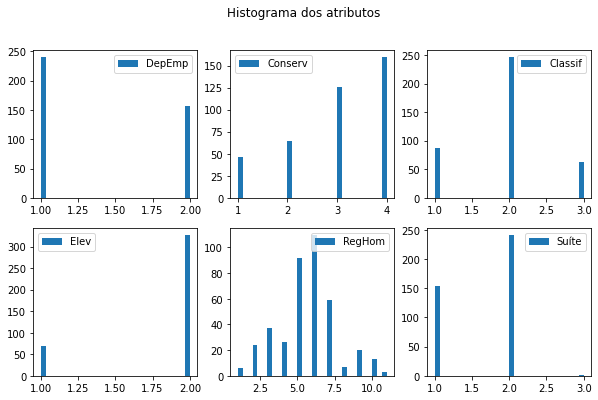

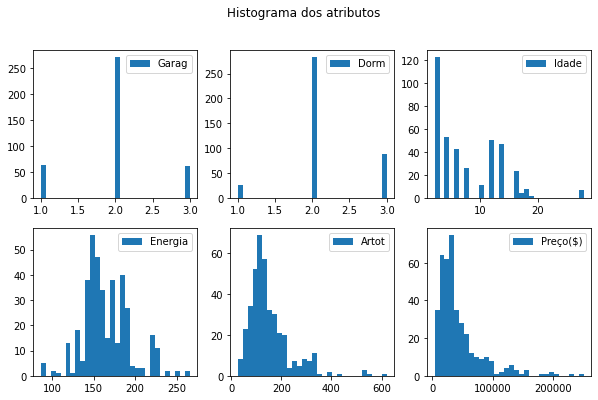

In [ ]:
X = gazola.iloc[:,1:(gazola.shape[1] - 2)]
y = gazola.iloc[:,(gazola.shape[1] - 1)]

# Recupera os nomes dos atributos

atributos = list(gazola)[1:(gazola.shape[1] - 2)]
rotulo = list(gazola)[(gazola.shape[1] - 1)]

# Exibe o histograma dos atributos.

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        ax[i, j].hist(X.iloc[:,(i*3 + j)], label=atributos[i*3+j], bins=30)
        ax[i, j].legend()

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
    for j in range(3):
        if j == 2 and i == 1:
            ax[i, j].hist(y.iloc[:],label=rotulo,bins=30)
        else:
            ax[i, j].hist(X.iloc[:,(i*3 + j+6)],label=atributos[i*3 + j+6], bins=30)
        ax[i, j].legend()

# Amostragem de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print("Base de treinamento:{0}".format(X_train.shape))
print("Base de teste:{0}".format(X_test.shape))




### TREINAMENTO POR REGRESSÃO LINEAR

```fit()``` realiza o ajusto do modelo (treinamento).

```predict()``` aplica o modelo sobre novos dados.


Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.82
Descrição do modelo: 
w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Número de atributos usados: 11
Erro percentual:
 Média: 0.25  Max: 0.87   Min: 0.00


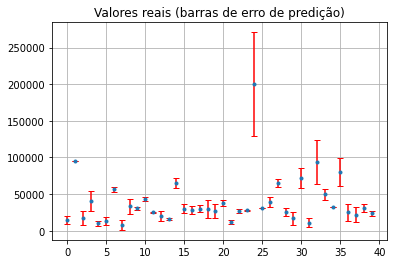

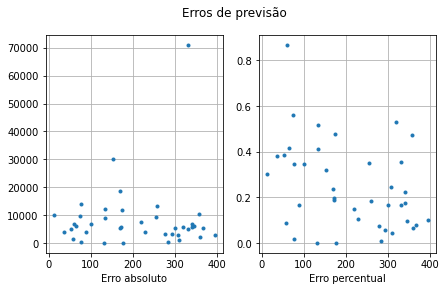

In [ ]:
lnr = LinearRegression().fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr.intercept_))
print("Número de atributos usados: {}".format(np.sum(lnr.coef_ != 0)))

# Calcula o erro absoluto e o erro percentual da regressao linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print('Erro percentual:\n Média: {0:.2f}  Max: {1:.2f}   Min: {2:.2f}'
      .format(np.mean(erroperc), np.max(erroperc), np.min(erroperc)))

plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erro de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr,'.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc,'.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()



### TRANSFORMAÇÃO DE DADOS NUMÉRICOS

Vamos explorar a transformação de dados, para resolver problemas de distribuição e a normalização de dados.


--------------- Regressão Linear Normalizada ---------------
Acurácia da base de treinamento: 0.96
Acurácia da base de testes: 0.93
Descrição do modelo: 
w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57

------------------  Comparação de pesos   ------------------
Original:
 w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57']  b: -15469.97
Normalizado:
 w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41']  b: 3.57


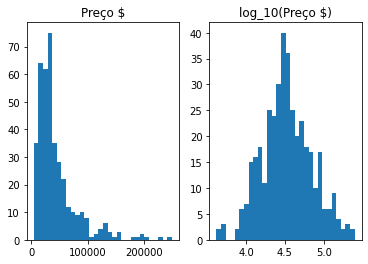

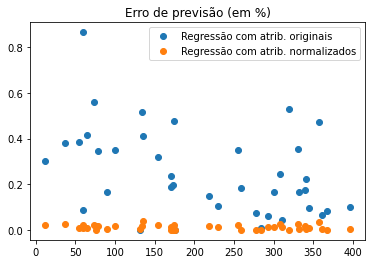

In [ ]:

# Os atributos possuem faixas de valores diferentes, que influencia os pesos
# dos coeficientes da regressão. Vamos trabalhar melhor os atributos.

X_scale = X

# Iremos aplicar o logaritmo em "Energia total", "Área total" e "Preço $".

X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)

# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].hist(y,bins=30, label='Preço $')
ax[0].set_title('Preço $')
ax[1].hist(y_scale,bins=30, label='log10(Preço $)')
ax[1].set_title('log_10(Preço $)')


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression().fit(X_train2, y_train2)

y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2

plt.figure(figsize=(6, 4))
plt.plot(erroperc,'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc,'o', label='Regressão com atrib. normalizados')
plt.title("Erro de previsão (em %)")
plt.legend()

print("\n--------------- Regressão Linear Normalizada ---------------")
print("Acurácia da base de treinamento: {:.2f}".format(lnr2.score(X_train2, y_train2)))
print("Acurácia da base de testes: {:.2f}".format(lnr2.score(X_test2, y_test2)))
print("Descrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("w: {}  b: {:.2f}".format(s, lnr2.intercept_))


print("\n------------------  Comparação de pesos   ------------------")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr.coef_)]
print("Original:\n w: {}  b: {:.2f}".format(s, lnr.intercept_))
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print("Normalizado:\n w: {}  b: {:.2f}".format(s, lnr2.intercept_))

